In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_parquet("..\data\processed\output.parquet")

In [3]:
df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4


In [4]:
df.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
count,1.317421e+07,1.317421e+07,1.317421e+07,1.317421e+07,284746.000000,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06,0.0,0.0,0.0
mean,2.113413e+16,6.526426e+02,3.846817e+06,1.219194e+01,3.157930,-5.493615e+01,-1.162997e+02,4.581144e+02,3.852363e+02,3.186237e+03,NaN,NaN,NaN
std,5.665220e+14,6.275818e+02,2.701387e+07,6.499188e+00,2.064042,5.201468e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05,NaN,NaN,NaN
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,2.101031e+16,2.890000e+02,4.394300e+05,6.000000e+00,1.000000,-3.529376e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02,NaN,NaN,NaN
50%,2.104022e+16,5.960000e+02,1.013425e+06,1.300000e+01,3.000000,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02,NaN,NaN,NaN
75%,2.110051e+16,8.970000e+02,1.740050e+06,1.800000e+01,5.000000,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03,NaN,NaN,NaN
max,2.210022e+16,2.047300e+04,1.749293e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.916000e+03,1.439000e+03,2.199078e+08,NaN,NaN,NaN


In [5]:
df.memory_usage()

Index                   128
session_id        105393688
index             105393688
elapsed_time      105393688
event_name        105393688
name              105393688
level             105393688
page              105393688
room_coor_x       105393688
room_coor_y       105393688
screen_coor_x     105393688
screen_coor_y     105393688
hover_duration    105393688
text              105393688
fqid              105393688
room_fqid         105393688
text_fqid         105393688
fullscreen        105393688
hq                105393688
music             105393688
level_group       105393688
dtype: int64

In [6]:
#Null analysis
df.isnull().sum()

session_id               0
index                    0
elapsed_time             0
event_name               0
name                     0
level                    0
page              12889465
room_coor_x        1036240
room_coor_y        1036240
screen_coor_x      1036240
screen_coor_y      1036240
hover_duration    12173474
text               8367320
fqid               4159648
room_fqid                0
text_fqid          8367266
fullscreen        13174211
hq                13174211
music             13174211
level_group              0
dtype: int64

In [7]:
df.shape

(13174211, 20)

In [8]:
#Drop full missing cols
df2=df.drop(columns=["fullscreen","hq","music"])
del df

In [9]:
df2[~df2["page"].isnull()].head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
941,20090312433251036,60,60743,notebook_click,open,2,0.0,-1112.320519,-518.582269,30.0,639.0,NaN,None,None,tunic.historicalsociety.entry,None,0-4
942,20090312433251036,61,61761,notebook_click,close,2,0.0,73.221989,428.191813,789.0,58.0,NaN,None,None,tunic.historicalsociety.entry,None,0-4
1079,20090312433251036,209,351064,notebook_click,open,6,1.0,-490.732665,-429.718879,61.0,629.0,NaN,None,None,tunic.historicalsociety.basement,None,5-12
1080,20090312433251036,210,354779,notebook_click,basic,6,1.0,-97.641756,-304.264333,343.0,539.0,NaN,None,None,tunic.historicalsociety.basement,None,5-12
1081,20090312433251036,211,357947,notebook_click,close,6,1.0,556.115820,342.523546,812.0,75.0,NaN,None,None,tunic.historicalsociety.basement,None,5-12


In [10]:
df2["event_name"].unique()

array(['cutscene_click', 'person_click', 'navigate_click',
       'observation_click', 'notification_click', 'object_click',
       'object_hover', 'map_hover', 'map_click', 'checkpoint',
       'notebook_click'], dtype=object)

In [11]:
df2["name"].unique()

array(['basic', 'undefined', 'close', 'open', 'prev', 'next'],
      dtype=object)

In [12]:
df2["event_name"].unique()

array(['cutscene_click', 'person_click', 'navigate_click',
       'observation_click', 'notification_click', 'object_click',
       'object_hover', 'map_hover', 'map_click', 'checkpoint',
       'notebook_click'], dtype=object)

In [13]:
df2["level_group"].unique()

array(['0-4', '5-12', '13-22'], dtype=object)

# Missing Analysis

In [14]:
missing_cols=["page","hover_duration","text","fqid","text_fquid"]
coord=["room_coor_x","room_coor_y","screen_coor_x","screen_coor_y"]

In [15]:
#Age trend
page_not_missing=df2["page"][~df2["page"].isnull()]
page_not_missing.size

284746

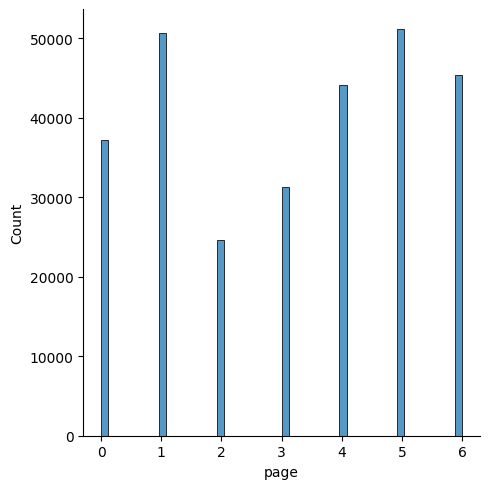

In [16]:
import seaborn as sns
sns.displot(page_not_missing)

In [17]:
hover_duration_not_missing=df2["hover_duration"][~df2["hover_duration"].isnull()]
hover_duration_not_missing.size

1000737

<Axes: xlabel='hover_duration', ylabel='Density'>

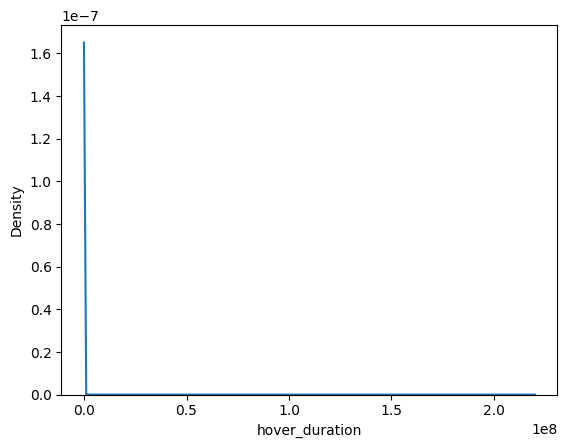

In [18]:
sns.kdeplot(hover_duration_not_missing)

In [19]:
text_not_missing=df2["text"][~df2["text"].isnull()]
text_not_missing.size

4806891

In [20]:
text_not_missing.value_counts()

undefined                                           178294
\u00f0\u0178\u02dc\u0090                             24383
Hey!                                                 23724
I should go to the Capitol and tell Mrs. M!          20074
This is perfect for the exhibit.                     19987
                                                     ...  
Sorry for the delay, Boss.                               1
And where's your grampa?                                 1
Who is Teddy?                                            1
AND I know who took Teddy!                               1
Meet me back in my office and we'll get started!         1
Name: text, Length: 594, dtype: int64

In [21]:
text_fqid_missing=df2["text_fqid"][~df2["text_fqid"].isnull()]
text_fqid_missing.size

4806945

In [22]:
text_fqid_missing.value_counts()

tunic.historicalsociety.cage.confrontation               333363
tunic.wildlife.center.crane_ranger.crane                 235368
tunic.historicalsociety.frontdesk.archivist.newspaper    214637
tunic.historicalsociety.entry.groupconvo                 213592
tunic.wildlife.center.wells.nodeer                       199978
                                                          ...  
tunic.wildlife.center.fox.concern                           111
tunic.drycleaner.frontdesk.block_0                          106
tunic.historicalsociety.entry.gramps.hub                     21
tunic.humanecology.frontdesk.block_1                          8
tunic.drycleaner.frontdesk.block_1                            3
Name: text_fqid, Length: 126, dtype: int64

In [23]:
fqid_not_missing=df2["fqid"][~df2["fqid"].isnull()]
fqid_not_missing.size

9014563

In [24]:
fqid_not_missing.value_counts()

worker           939555
archivist        563259
gramps           561000
wells            394234
toentry          392221
                  ...  
block_badge         854
need_glasses        675
block_badge_2       508
fox                 166
block_1              25
Name: fqid, Length: 127, dtype: int64

In [25]:
["room_coor_x","room_coor_y","screen_coor_x","screen_coor_y"]
X_coord=df2["room_coor_x"].sample(10000)
Y_coord=df2["room_coor_y"].sample(10000)
X_coord_2=df2["screen_coor_x"].sample(10000)
Y_coord_2=df2["screen_coor_y"].sample(10000)

<Axes: xlabel='room_coor_x', ylabel='room_coor_y'>

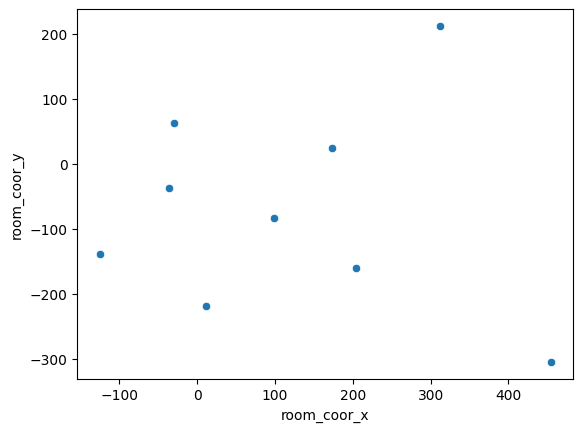

In [26]:
sns.scatterplot(x=X_coord,y=Y_coord)

In [28]:
# Current decision - drop all columns with missing except for coordinates. Replace with mean on the missing values and save
# the modified dataframe
df3=df2.drop(columns=["page","hover_duration","text","text_fqid","fqid"])
del df2


In [29]:
df3.head()

,session_id,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,room_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,-413.991405,-159.314686,380.0,494.0,tunic.historicalsociety.closet,0-4
1,20090312431273200,1,1323,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,tunic.historicalsociety.closet,0-4
2,20090312431273200,2,831,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,tunic.historicalsociety.closet,0-4
3,20090312431273200,3,1147,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,tunic.historicalsociety.closet,0-4
4,20090312431273200,4,1863,person_click,basic,0,-412.991405,-159.314686,381.0,494.0,tunic.historicalsociety.closet,0-4


In [31]:
#Missing replacement
for i in coord:
    mean=df3[i].mean()
    df3[i]=df3[i].fillna(mean)

In [33]:
df3.isna().sum()

session_id       0
index            0
elapsed_time     0
event_name       0
name             0
level            0
room_coor_x      0
room_coor_y      0
screen_coor_x    0
screen_coor_y    0
room_fqid        0
level_group      0
dtype: int64

In [34]:
#Downcasting
#https://towardsdatascience.com/how-to-reduce-the-size-of-a-pandas-dataframe-in-python-7ed6e4269f88
## downcasting loop
for column in df3.columns:
 if df3[column].dtype == "float64":
    df3[column]=pd.to_numeric(df3[column], downcast="float")
 if df3[column].dtype == "int64":
    df3[column]=pd.to_numeric(df3[column], downcast="integer")

In [36]:
df3.memory_usage()

Index                  128
session_id       105393688
index             26348422
elapsed_time      52696844
event_name       105393688
name             105393688
level             13174211
room_coor_x       52696844
room_coor_y       52696844
screen_coor_x     52696844
screen_coor_y     52696844
room_fqid        105393688
level_group      105393688
dtype: int64

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   session_id     int64  
 1   index          int16  
 2   elapsed_time   int32  
 3   event_name     object 
 4   name           object 
 5   level          int8   
 6   room_coor_x    float32
 7   room_coor_y    float32
 8   screen_coor_x  float32
 9   screen_coor_y  float32
 10  room_fqid      object 
 11  level_group    object 
dtypes: float32(4), int16(1), int32(1), int64(1), int8(1), object(4)
memory usage: 791.5+ MB


In [38]:
#Exporting to new parquet
df3.to_parquet('../data/processed/filtered_V1.parquet')